In [2]:
import modelskill as ms

In [3]:
mr = ms.model_result('../tests/testdata/Oresund2D.dfsu',
                     item='Surface elevation')
mr

<DfsuModelResult> 'Oresund2D'

In [4]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = ms.PointObservation(fn, x=366844.15, y=6154291.6, item=0) 
o1

PointObservation: smhi_2095_klagshamn, x=366844.15, y=6154291.6

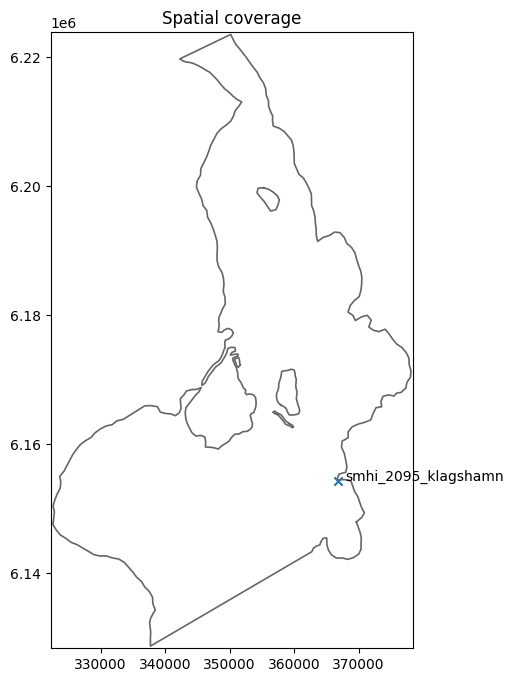

In [5]:
ms.plotting.spatial_overview(o1, mr, figsize=(8, 8));

In [6]:
cmp = ms.match(o1, mr)
cmp

<Comparer>
Quantity: Water Level [m]
Observation: smhi_2095_klagshamn, n_points=167
 Model: Oresund2D, rmse=0.191

Most use cases will compare many observed locations to a one or more models.

In this case we only have one observed location.

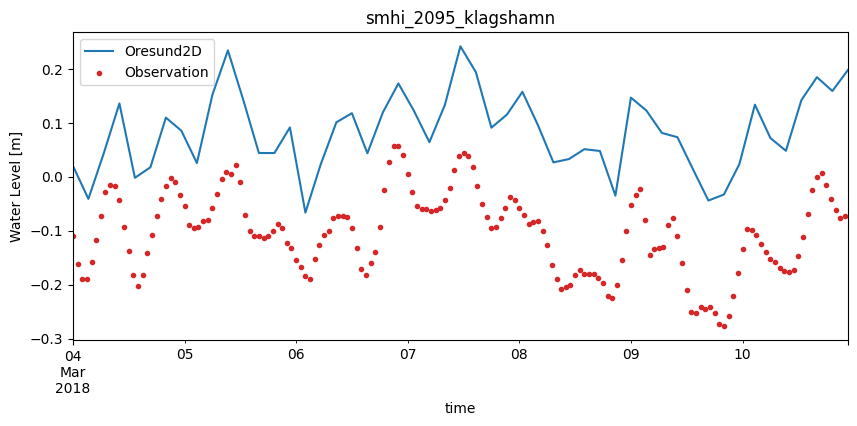

In [7]:
cmp.plot.timeseries(figsize=(10,4));

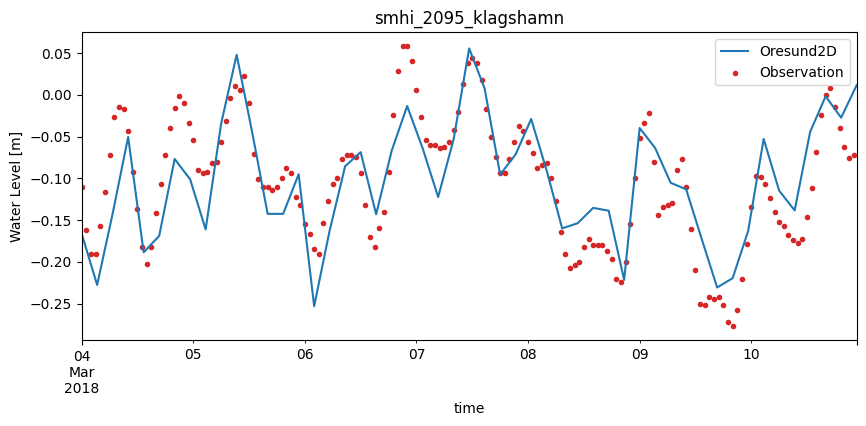

In [8]:
ub_cmp = cmp.remove_bias()
ub_cmp.plot.timeseries(figsize=(10,4));

In [9]:
ub_cmp.score("bias")

{'Oresund2D': -2.9251385079944247e-17}

In [11]:
cmp.score("bias")

{'Oresund2D': 0.1868744370781926}

<Axes: title={'center': 'smhi_2095_klagshamn'}, xlabel='time', ylabel='Water Level [m]'>

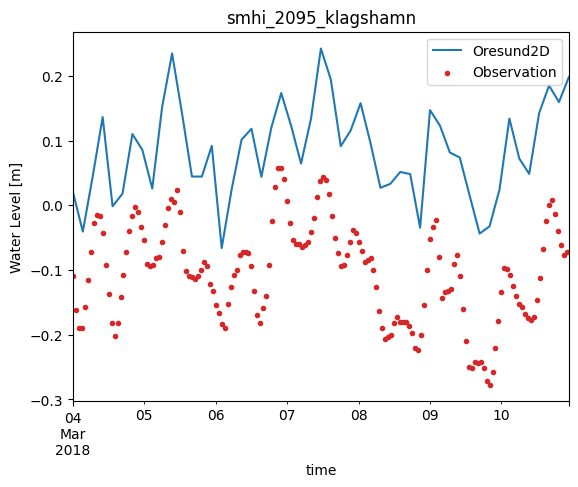

In [12]:
cmp.plot.timeseries()

Get skill for a commonly used set of metrics

In [11]:
cmp.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
smhi_2095_klagshamn,167,0.184411,0.188837,0.040645,0.184411,0.841135,0.376413,-5.338911


Or choose specific metrics

In [13]:
cmp.metrics = ["bias","rmse"]
cmp.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
smhi_2095_klagshamn,167,0.186874,0.191303,0.040924,0.186874,0.838306,0.378995,-5.505521


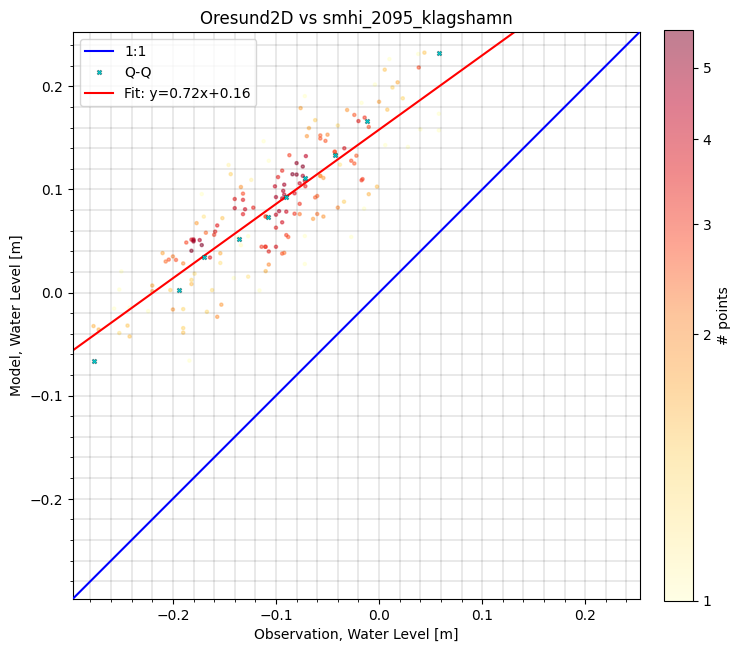

In [14]:
cmp.plot.scatter(bins=0.02, cmap='YlOrRd', show_points=True);

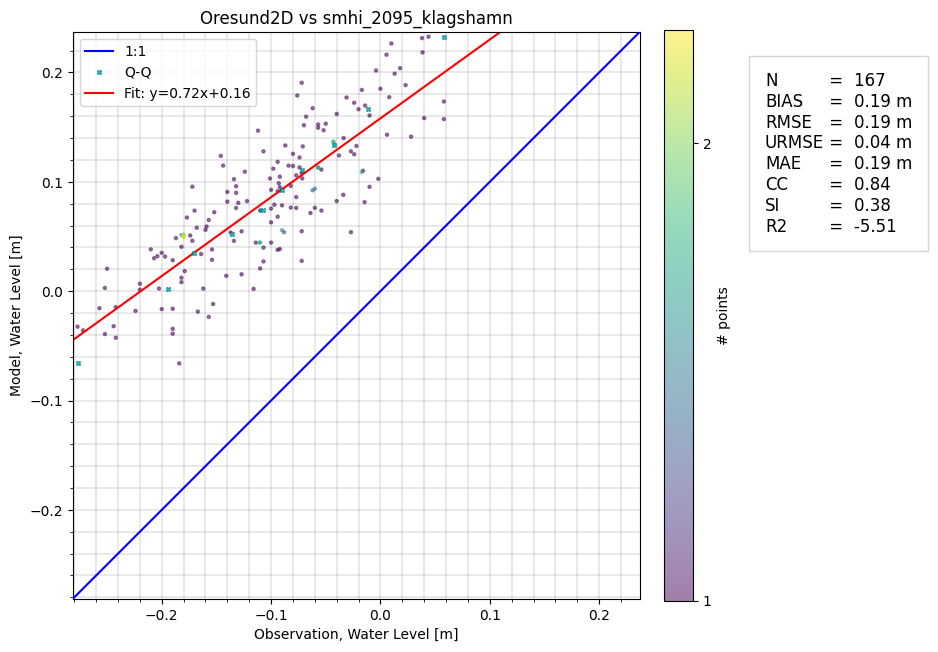

In [15]:
cmp.plot.scatter(skill_table=True, show_points=True);